## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

## 1: Load and Understand the Dataset

In [4]:
# Load the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

# Display the first few rows of the training dataset
print("Training Dataset:")
print(train.head())

# Display the shape of the datasets
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")
print(f"Gender Submission shape: {gender_submission.shape}")

# Display summary information about the datasets
print(train.info())
print(test.info())

Training Dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500  

## 2: Calculate Summary Statistics for Relevant Variables

In [6]:
# Summary statistics for the training dataset
summary_stats = train.describe()
print(summary_stats)

# Summary statistics for categorical variables
categorical_summary = train.describe(include=['object'])
print(categorical_summary)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
                           Name   Sex  Ticket    Cabin Embarked
count            

## 3: Visualize the Distribution of Variables

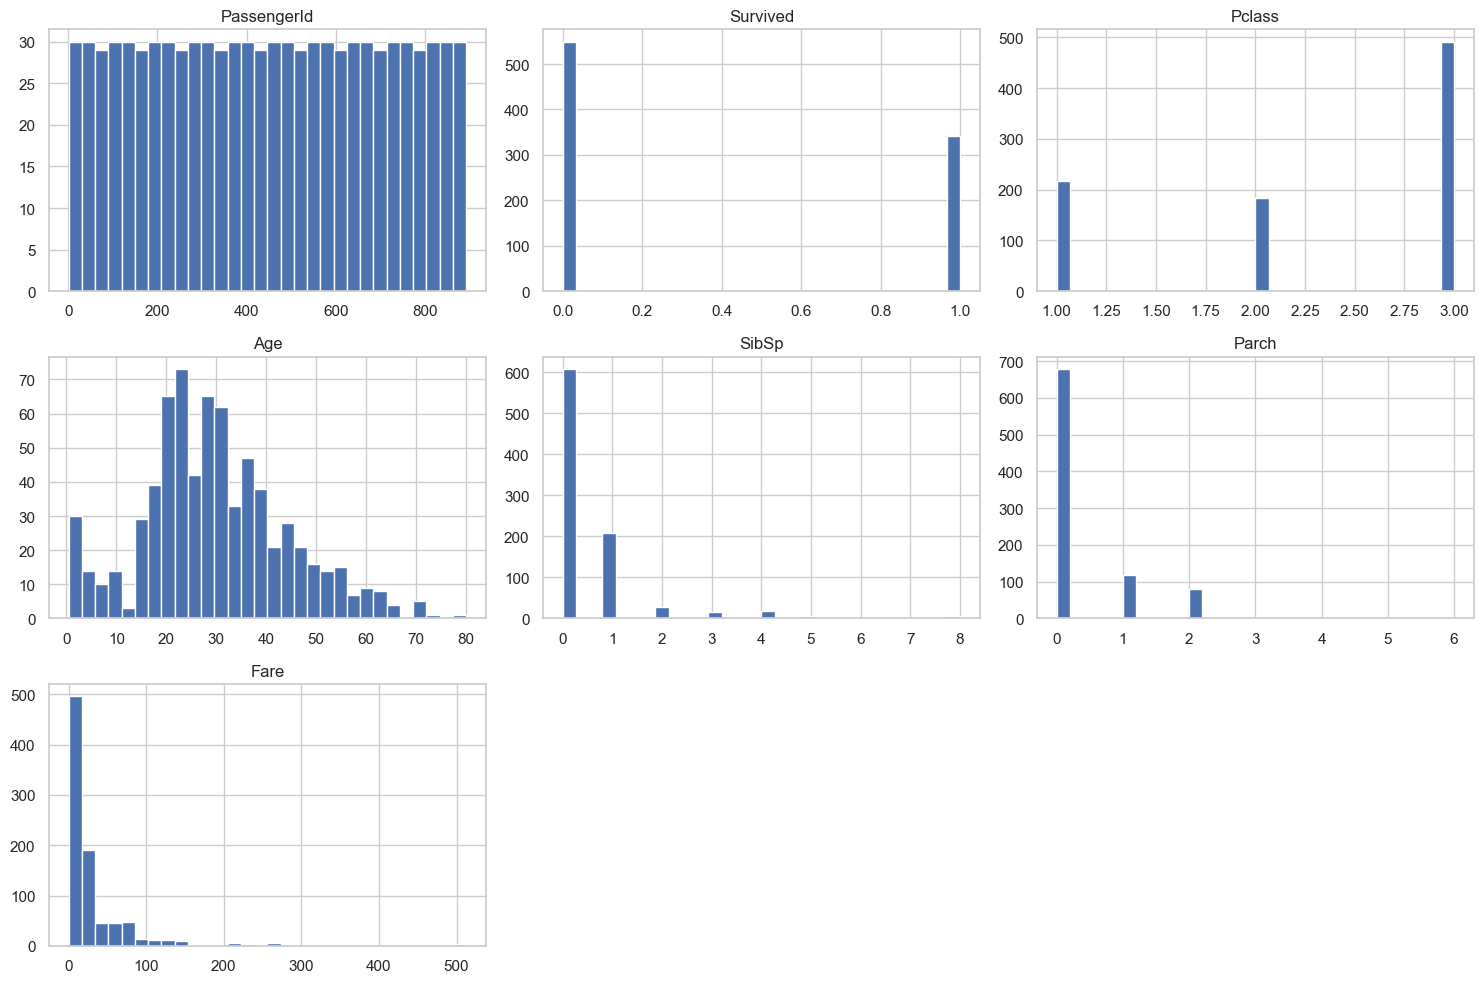

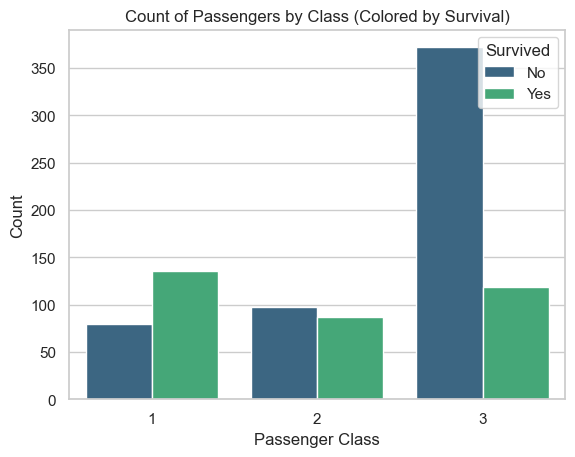

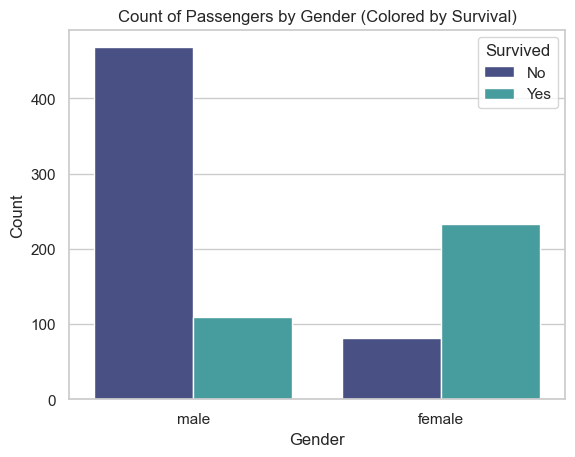

In [8]:
# Histogram for numerical features
train.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Bar plot for passenger class distribution with hue for survival
sns.countplot(data=train, x='Pclass', hue='Survived', palette='viridis')
plt.title('Count of Passengers by Class (Colored by Survival)')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

# Bar plot for gender distribution with hue for survival
sns.countplot(data=train, x='Sex', hue='Survived', palette='mako')
plt.title('Count of Passengers by Gender (Colored by Survival)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

## 4: Explore Relationships Between Variables

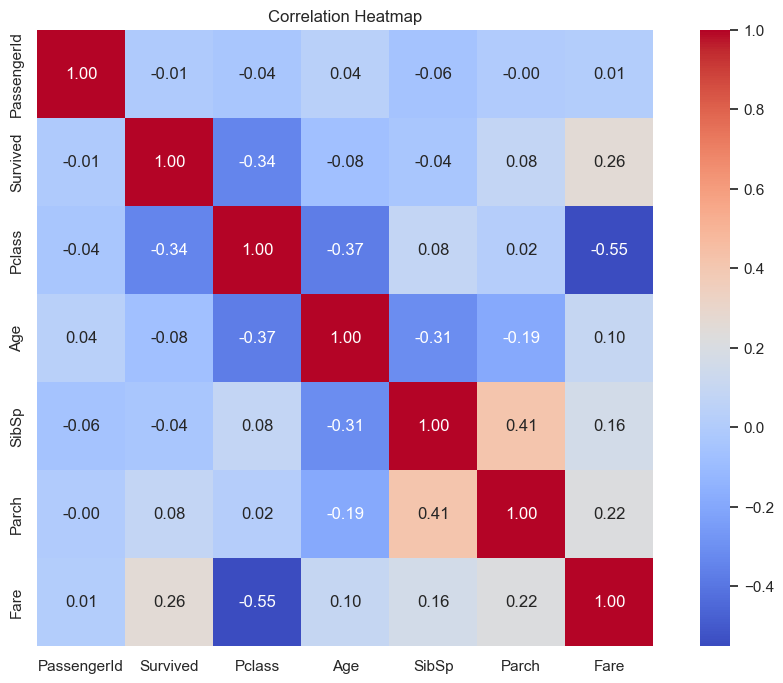

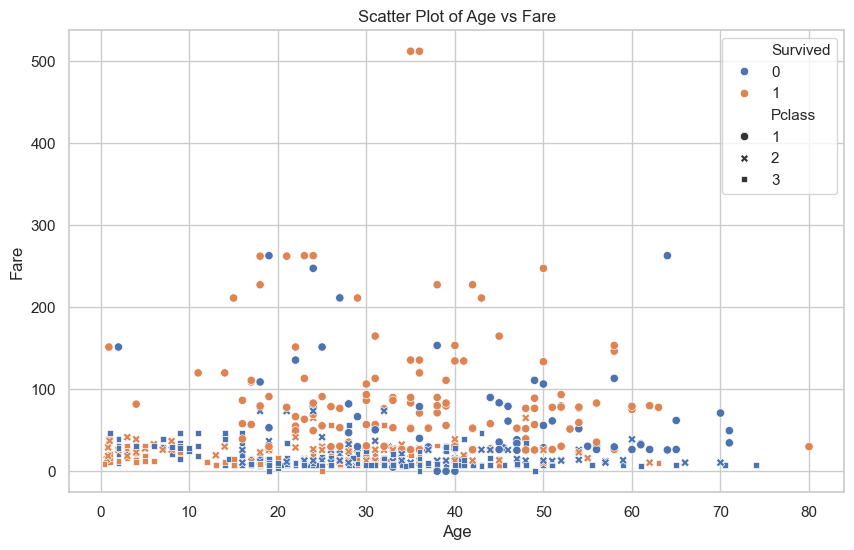

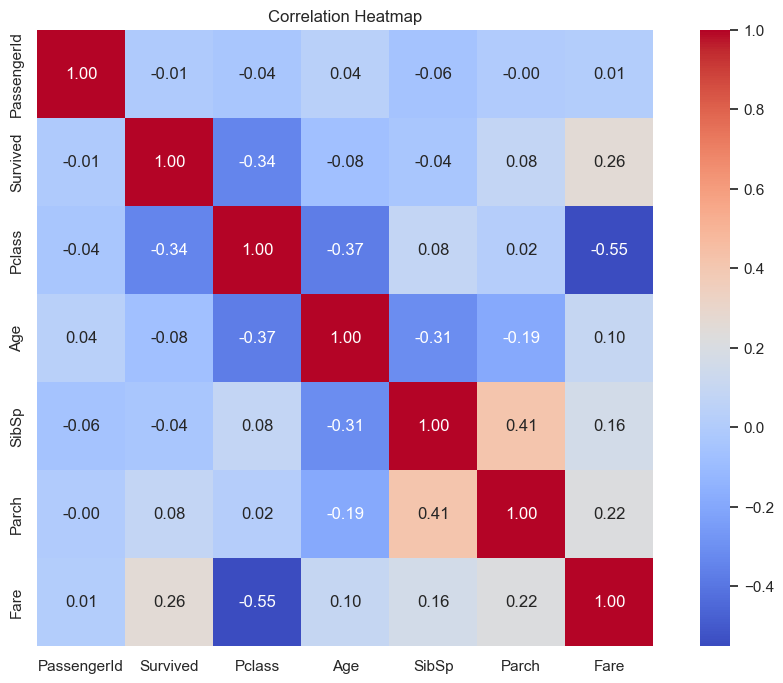

In [10]:
# Select only numeric columns for correlation matrix
numeric_cols = train.select_dtypes(include=[np.number]).columns
correlation_matrix = train[numeric_cols].corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot for Age vs Fare
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='Age', y='Fare', hue='Survived', style='Pclass', palette='deep')
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Select only numeric columns for correlation matrix
numeric_cols = train.select_dtypes(include=[np.number]).columns
correlation_matrix = train[numeric_cols].corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

## 5: Identify Patterns, Trends, or Anomalies

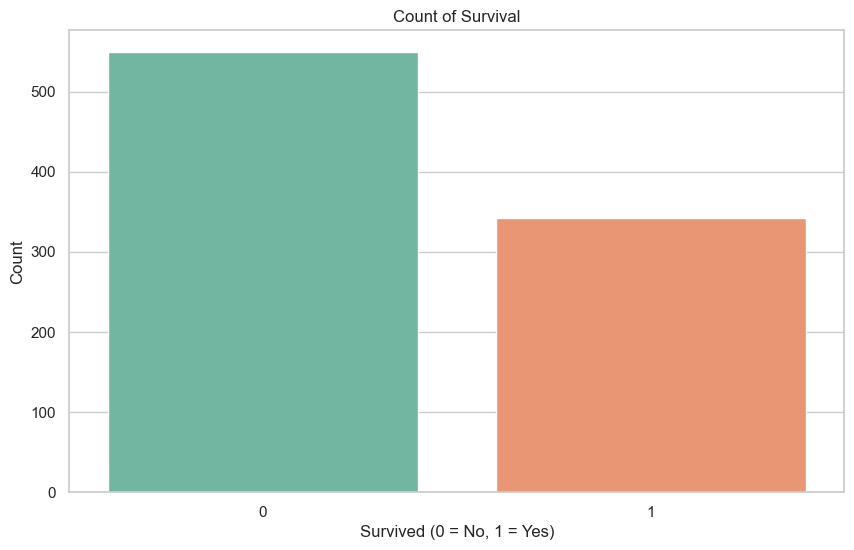

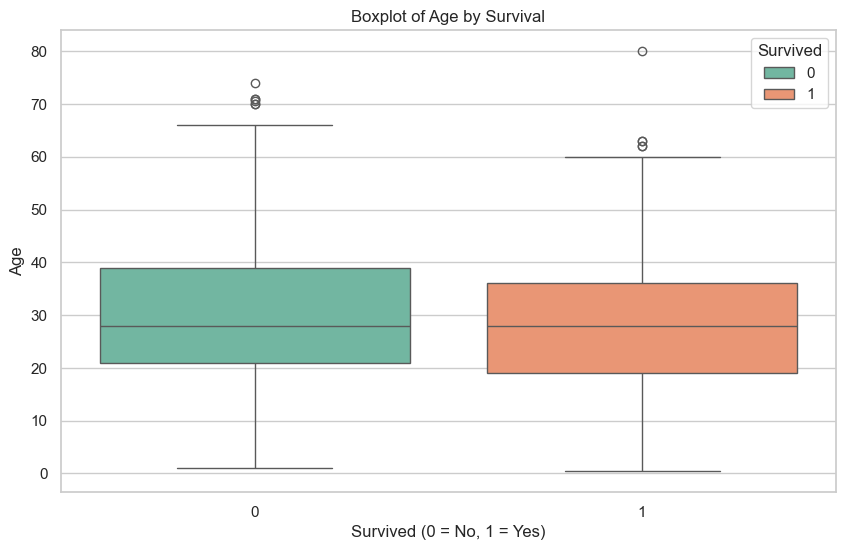

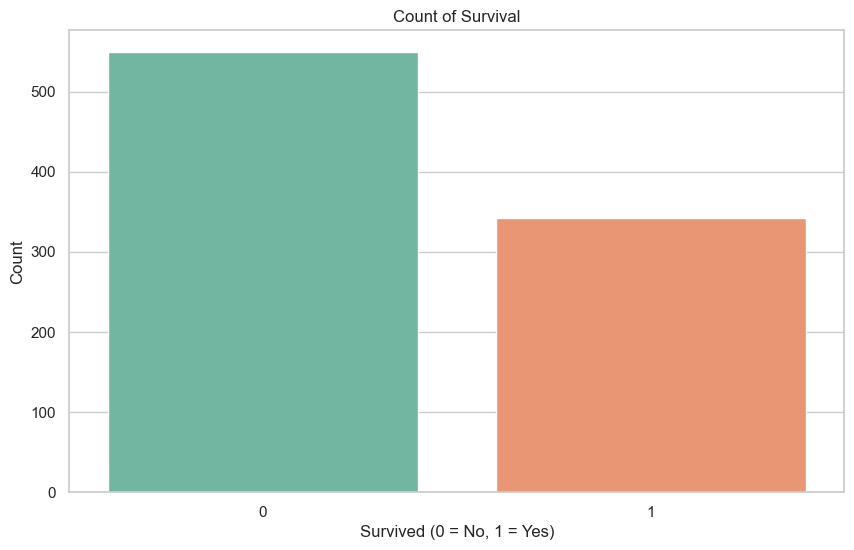

In [12]:
# Countplot for Survival
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='Survived', hue='Survived', palette='Set2', legend=False)
plt.title('Count of Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Step 5: Boxplot of Age by Survival
plt.figure(figsize=(10, 6))
sns.boxplot(data=train, x='Survived', y='Age', hue='Survived', palette='Set2')
plt.title('Boxplot of Age by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.legend(title='Survived', loc='upper right')  # Optional: Add legend if you want
plt.show()

# Countplot for Survival
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='Survived', hue='Survived', palette='Set2', legend=False)
plt.title('Count of Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

## 6: Summary of Findings and Insights

1. **Age Distribution**:
   - The age distribution of passengers is **right-skewed**, indicating that a significant number of passengers were younger, with the highest concentration of ages between **20-30 years**. This could suggest that younger individuals were more likely to travel.

2. **Gender Impact on Survival**:
   - There is a notable difference in survival rates between genders:
     - **Females** had a significantly higher survival rate compared to **males**. This highlights a potential bias in survival opportunities during the tragedy, possibly influenced by social norms at the time that prioritized women and children.

3. **Passenger Class (Pclass)**:
   - Survival rates varied significantly by passenger class:
     - Passengers in **first class** had the highest survival rates, followed by those in **second class**, while **third-class passengers** experienced the lowest survival rates. This suggests that access to resources and priority in evacuations may have been stratified by socioeconomic status.

4. **Family Size**:
   - The survival rates of passengers traveling with family were higher than those traveling alone. This could indicate that being part of a family unit might have improved chances of survival, as families often looked out for one another during the evacuation process.

5. **Fare Distribution**:
   - The distribution of fares paid by passengers shows that first-class tickets were substantially more expensive than those in other classes, reinforcing the socioeconomic divisions seen in the survival rates.

6. **Correlations**:
   - Several variables showed correlations with survival, including:
     - **Pclass** and **Sex** had strong associations with survival outcomes.
     - Other features like **SibSp** (siblings/spouses aboard) and **Parch** (parents/children aboard) also demonstrated relationships that merit further exploration.

7. **Outliers**:
   - The analysis identified potential outliers, particularly in age and fare distributions, which could warrant further investigation. For instance, very high fares could be linked to first-class tickets, while extreme ages might require further contextual understanding.

8. **General Insights**:
   - The data suggest that survival during the Titanic disaster was significantly influenced by **socioeconomic factors**, **gender**, and **family dynamics**. This implies that the response to emergencies can be affected by pre-existing social structures.


## 7: Visualizations Using Both Seaborn and Matplotlib

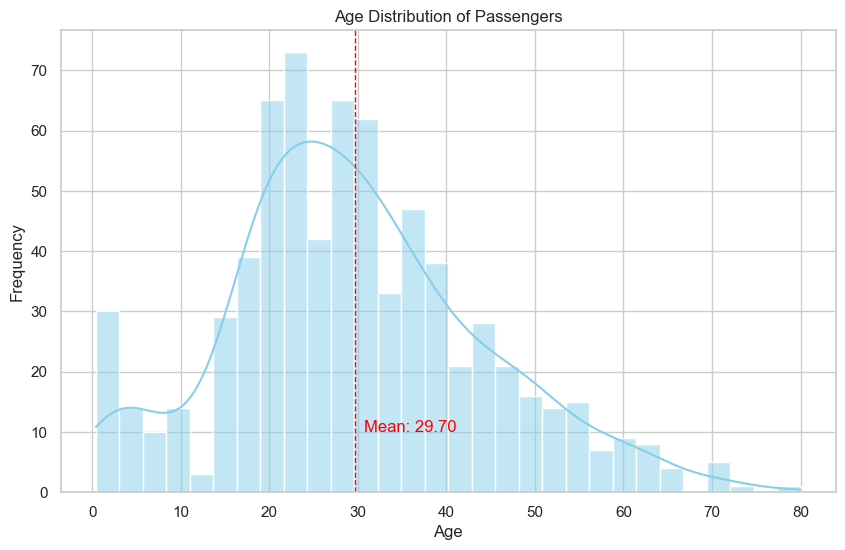

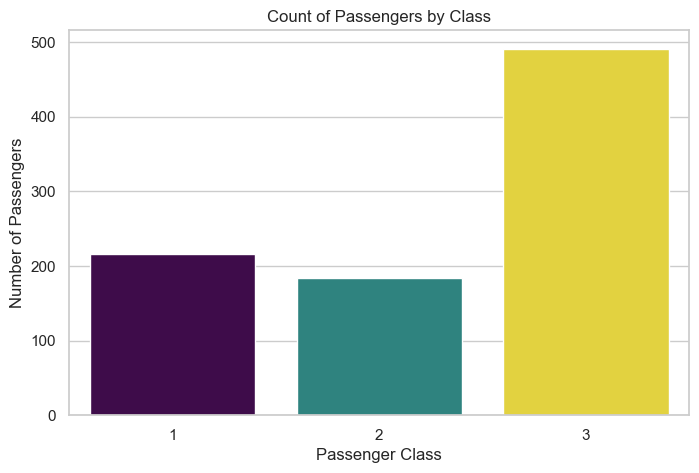

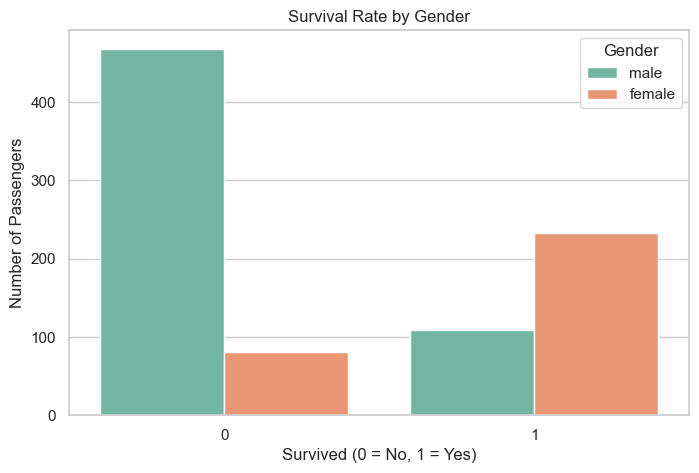

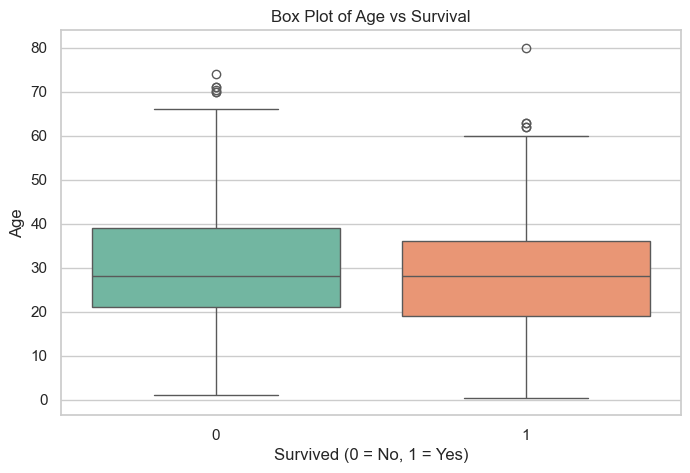

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
train = pd.read_csv('train.csv')

# Set the visualisation style
sns.set(style="whitegrid")

# 1. Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(train['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axvline(train['Age'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.text(train['Age'].mean()+1, 10, f'Mean: {train["Age"].mean():.2f}', color='red')
plt.show()

# 2. Count of Passengers by Class
plt.figure(figsize=(8, 5))
sns.countplot(data=train, x='Pclass', hue='Pclass', palette='viridis', legend=False)
plt.title('Count of Passengers by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.show()

# 3. Survival Rate by Gender
plt.figure(figsize=(8, 5))
sns.countplot(data=train, x='Survived', hue='Sex', palette='Set2')
plt.title('Survival Rate by Gender')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Number of Passengers')
plt.legend(title='Gender')
plt.show()

# 4. Box Plot for Age vs Survival
plt.figure(figsize=(8, 5))
sns.boxplot(data=train, x='Survived', y='Age', hue='Survived', palette='Set2', legend=False)
plt.title('Box Plot of Age vs Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()